<a href="https://colab.research.google.com/github/WiltshireWizard/Apple_Variety_Classification/blob/master/Apple_Varieties_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from  google.colab import drive

In [ ]:
from fastai.vision import *

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
proj_path = 'gdrive/My Drive/Apple Varieties/'

In [ ]:
p_path = Path(proj_path)

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.3,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['braeburn', 'bramley', 'cox', 'gala', 'russet']

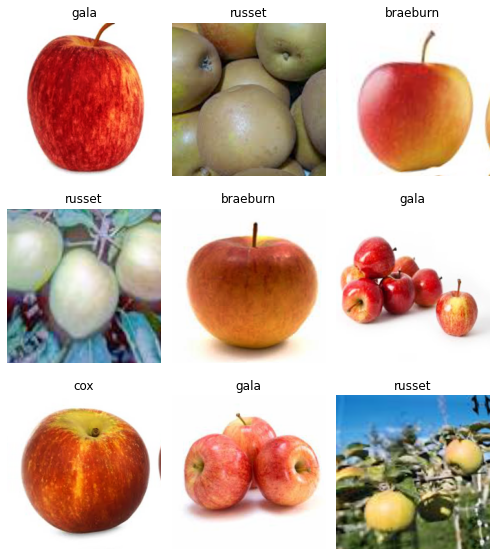

In [ ]:
data.show_batch(rows=3,figsize=(7,8))

In [ ]:
data.c, len(data.train_ds), len(data.valid_ds)

(5, 563, 241)

In [ ]:
#create cnn_learner object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.733655,1.411064,0.580913,03:50
1,2.093984,0.933899,0.319502,03:22
2,1.735468,1.006798,0.311203,03:22
3,1.472834,1.019840,0.269710,03:28
4,1.253224,1.009114,0.298755,03:21
5,1.104421,0.989696,0.265560,03:26
6,0.976587,0.968556,0.282158,03:22
7,0.882332,0.967506,0.282158,03:22


In [ ]:
learn.save('Apples_model1_34', return_path=True)

PosixPath('gdrive/My Drive/Apple Varieties/models/Apples_model1_34.pth')

In [ ]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


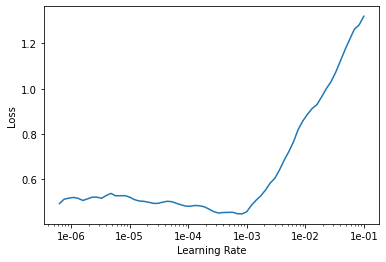

In [ ]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [ ]:
# fit whole model with new learning rates 
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-3), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.460055,0.941508,0.248963,04:50
1,0.388489,1.008081,0.265560,04:44
2,0.344537,0.960278,0.265560,04:43
3,0.302440,0.978425,0.253112,04:47
4,0.277776,0.978069,0.248963,04:41


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


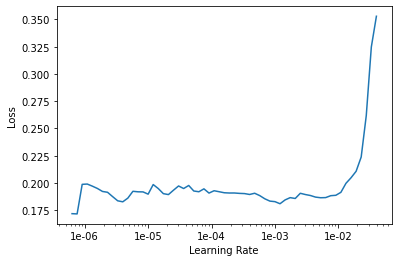

In [ ]:

learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.save('Apple_model2_34')

In [ ]:
learn.load('Apple_model2_34')
interp = ClassificationInterpretation.from_learner(learn)

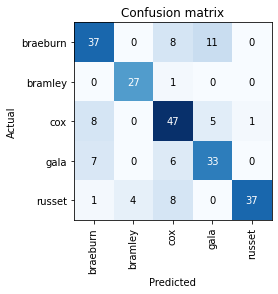

In [ ]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

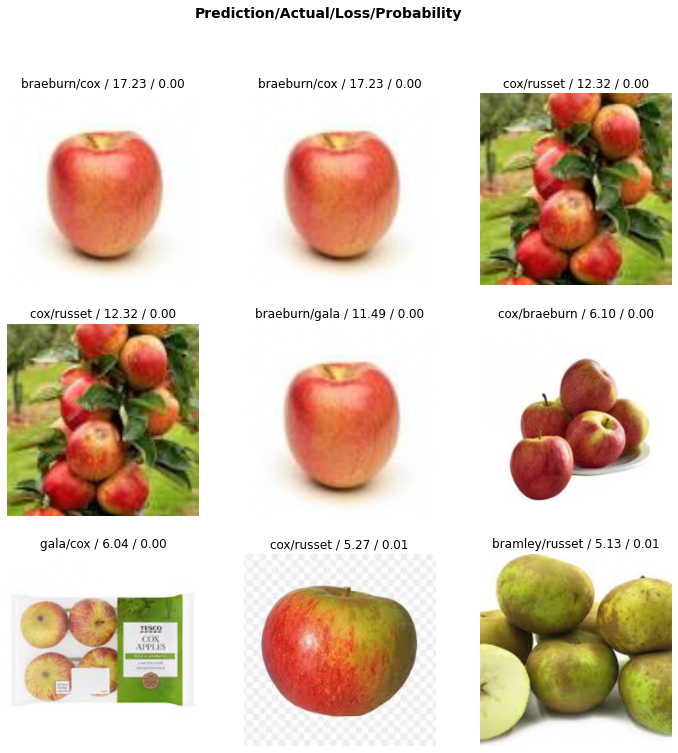

In [ ]:
interp.plot_top_losses(9)

In [ ]:
img_Bramley= open_image(p_path/'Validation'/'Bramley.jpg')
bramley = img_Bramley.resize(224)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(bramley)
pred_class

Category tensor(1)

In [ ]:
img_Bramley= open_image(p_path/'Validation'/'Braeburn.jpg')
braeburn = img_Bramley.resize(224)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(braeburn)
pred_class

Category tensor(4)